# Summary Statistics - Examples
In these exercises you'll use a real life medical dataset to learn how to obtain basic statistics from the data. This dataset comes from [Gluegrant](https://www.gluegrant.org/), an American project that aims to find a which genes are more important for the recovery of severely injured patients! 

## Dataset information

The dataset is a medical dataset with 184 patients, distributed into 2 test groups where each group divided in 2, patients and control.
The dataset is composed of clinical values:
* Patient.id
* Age
* Sex
* Group (to what group they belong)
* Results (the outcome of the patient)
* *And __~55k genes__*

### Import Data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

CSS = """
.output {
    flex-direction: row;
}
"""

complete_data = pd.read_csv("../data/Exercises_Summary_Statistics_Data.csv")
complete_data = complete_data.set_index('Patient_id')

The dimensions of the dataset are

In [2]:
complete_data.shape

(184, 10)

Let's take a look:

In [3]:
complete_data.iloc[:, 0:15].head()

,Age,Sex,Result,Group,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6
Patient_id,,,,,,,,,,
1,20,male,control,Control,950.444,5609.021,530.861,56.001,38.539,32.496
2,34,female,control,Control,728.066,3337.738,271.314,60.238,37.117,30.645
3,40,female,control,Control,1208.076,4430.424,520.859,67.374,41.698,29.476
4,31,male,control,Control,3426.842,6524.846,842.426,68.772,36.682,32.125
5,21,female,control,Control,3781.265,7916.231,574.768,70.522,34.877,27.416


### For those without biological background

You can consider that this dataset comes from a online shopping service like Amazon. Imagine that they were conducting an A/B test, where a small part of their website was changed, like the related items suggestions. You have 2 groups, the "control group" that is the group that is experiencing the original website (without modifications) and Group 1 that is using the website with the new suggestions.

Consider also that the genes are products or product categories where the customers buy a certain ammount of products. Your objective now is to find if there is a significant difference between the __control group__ and __Group 1__.

## Analysis to perform
* Basic statistics on the differences between patients of differnet sexes.
* Check what happened to the patients.
* Check which genes are more or less expressed in the patients.

### Age statistics for each of the sexes

In [5]:
male_patients = complete_data[complete_data.Sex == "male"]
female_patients =  complete_data[complete_data.Sex == "female"]

# Mean
male_mean_age = male_patients.Age.mean()
female_mean_age = female_patients.Age.mean()

# Median
male_median_age = male_patients.Age.median()
female_median_age = female_patients.Age.median()

# Std
male_std_age = male_patients.Age.std()
female_std_age = female_patients.Age.std()

print("The male mean age is:", male_mean_age, "The median age is:", male_median_age, \
      "and the standard dev is:", male_std_age)
print("The female mean age is:", female_mean_age, "The median age is:", female_median_age, \
      "and the standard dev is:", female_std_age)

The male mean age is: 32.95652173913044 The median age is: 32.0 and the standard dev is: 11.174368622493418
The female mean age is: 33.3768115942029 The median age is: 33.0 and the standard dev is: 11.014831510921137


### Quantiles

In [6]:
display(male_patients.Age.quantile(q=[0,1/4,1/2,3/4,1]))
display(female_patients.Age.quantile(q=[0,1/4,1/2,3/4,1]))

0.00    16.0
0.25    23.0
0.50    32.0
0.75    43.0
1.00    55.0
Name: Age, dtype: float64

0.00    17.0
0.25    25.0
0.50    33.0
0.75    41.0
1.00    55.0
Name: Age, dtype: float64

There is almost no difference from the sexes! Really strange to see such close numbers...

### Check out what happened to the patients

We have a column named _Results_ that has the information of what happened to the patient. It has both happy and tragic information. Let's first check out how many results there are.

In [7]:
#Lets first remove the control patients. Those patients don't hava a result since they weren't injured.
patient_data = complete_data[~complete_data.Group.isin(["Control"])]
patient_data.Result.unique()

array(['09: Death', '06: Home', '02: Skilled nursing facility',
       '01: Inpatient rehabilitation facility', '88: Other (specify)',
       '05: Home with services', '07: Another acute care facility',
       'control'], dtype=object)

Ok, we have 8 types of outcomes for the patients. _One of them is control, ignore that, it's a problem with the dataset._

Let's check the numbers for each of these outcomes.

In [8]:
patient_data.Result.value_counts()

02: Skilled nursing facility             50
06: Home                                 37
01: Inpatient rehabilitation facility    30
control                                  17
05: Home with services                   11
09: Death                                 7
88: Other (specify)                       5
07: Another acute care facility           1
Name: Result, dtype: int64

Ok, so, good news, most of our patients survived the injury! :)

### Is there any gene difference that makes these differences?

Next step, is there any gene difference between the patients that survived the injury and those that didn't? 

(_Optional_): This question is very difficult to answer and in biostatistics we use something called survival analysis to model the patient's outcome according to a set of variables. Here we wont do that, but we will attempt to get a nice result!

Let's check if there are any genes that have very different values in the patients that survived and the ones that didn't!

In [9]:
patients_death = patient_data[patient_data.Result == "09: Death"]
patients_alive = patient_data[patient_data.Result != "09: Death"]

gene_names = ["Gene1", "Gene2", "Gene3", "Gene4", "Gene5", "Gene6"]

display(patients_death[gene_names].describe())
display(patients_alive[gene_names].describe())

HTML('<style>{}</style>'.format(CSS))

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,15139.870571,18878.937857,9387.305714,258.840000,41.496143,30.772143
std,2950.951932,2272.013493,2361.202572,438.835615,5.947910,6.700381
min,9188.998000,16078.555000,5985.571000,62.755000,32.100000,20.265000
25%,14940.678500,17392.816500,7720.098000,77.092500,38.556500,26.297000
50%,15661.511000,18217.162000,10471.703000,88.359000,42.332000,32.258000
75%,16260.619000,20251.048000,10909.176000,127.134000,43.957500,35.974000
max,18725.990000,22569.119000,11995.318000,1252.313000,51.013000,38.340000


,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,13608.552040,16866.263377,8506.073265,80.970517,40.547033,30.215530
std,3091.638953,2737.191925,2474.180091,10.138796,4.952128,4.832408
min,4216.792000,9000.672000,2076.031000,57.577000,29.299000,21.090000
25%,12061.415500,15236.947000,7217.568000,73.264500,37.288500,26.948000
50%,13512.042000,16941.197000,8870.878000,80.689000,40.281000,29.791000
75%,15896.543500,18730.372000,10103.303000,87.717000,42.876000,33.190000
max,21642.619000,23432.793000,13809.735000,116.463000,54.990000,56.933000


Looking at the mean, **Gene4** seems to be a good one to predict the death of the patient, since it is much higher on the dead patients that in the alive ones.
But the median (50% in the tables) say otherwise, I smell something fishy, let's see the plot of the data!

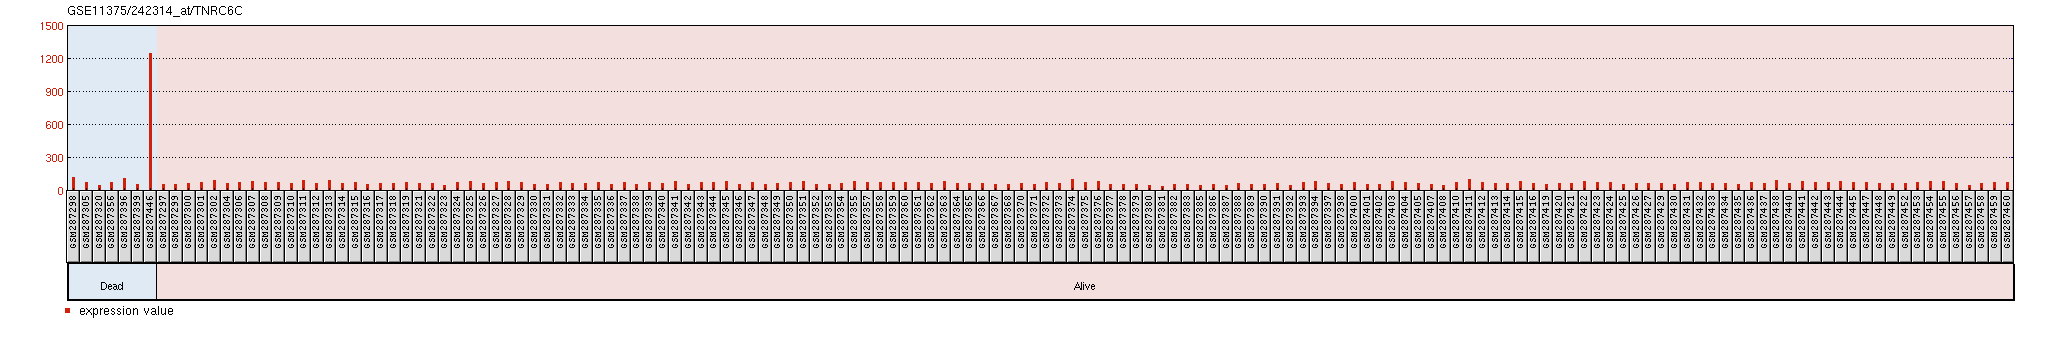

In [10]:
display(Image('./profileGraph.png', width=2000, unconfined=True))

So, it seems like our result was caused by an outlier! Therefore, there is no clear difference between the expression of gene4 on the dead and alive patients. (From the dataset of 55k genes I didn't find any gene with a significant difference between the groups).

# Exercise time

Ok guys, it's time to put to practice Summary Statistics. Please open the Exercises on the Exercise folder and let the biostatistics begin! :)